# Predicting Car Price
We want to know which variables impact the price of the car and how well those variables describe the price of the car.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
cars = pd.read_csv('../../data/CarPrice_Assignment.csv')
display(cars.head())
print(cars.shape)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


(205, 26)


In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Cleaning & Preparation

In [7]:
# get car company names
# we will take the first element 
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])

# insert at the 4th column with the name CompanyName
cars.insert(3,"CompanyName",CompanyName)

# remove the carname column as we use the car company only
cars.drop(['CarName'],axis=1,inplace=True)

# preview first 5 rows of data
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# see the unique car company
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# we want to fix the incorrect names
# make all name lowercase
cars.CompanyName = cars.CompanyName.str.lower()

# write a function for replacement
def replace_name(check, new):
    cars.CompanyName.replace(check, new, inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

# see all the unique company names again
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
# check whether there are duplicats row
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [11]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Data Visualization

<Axes: title={'center': 'Car Price Spread'}, ylabel='price'>

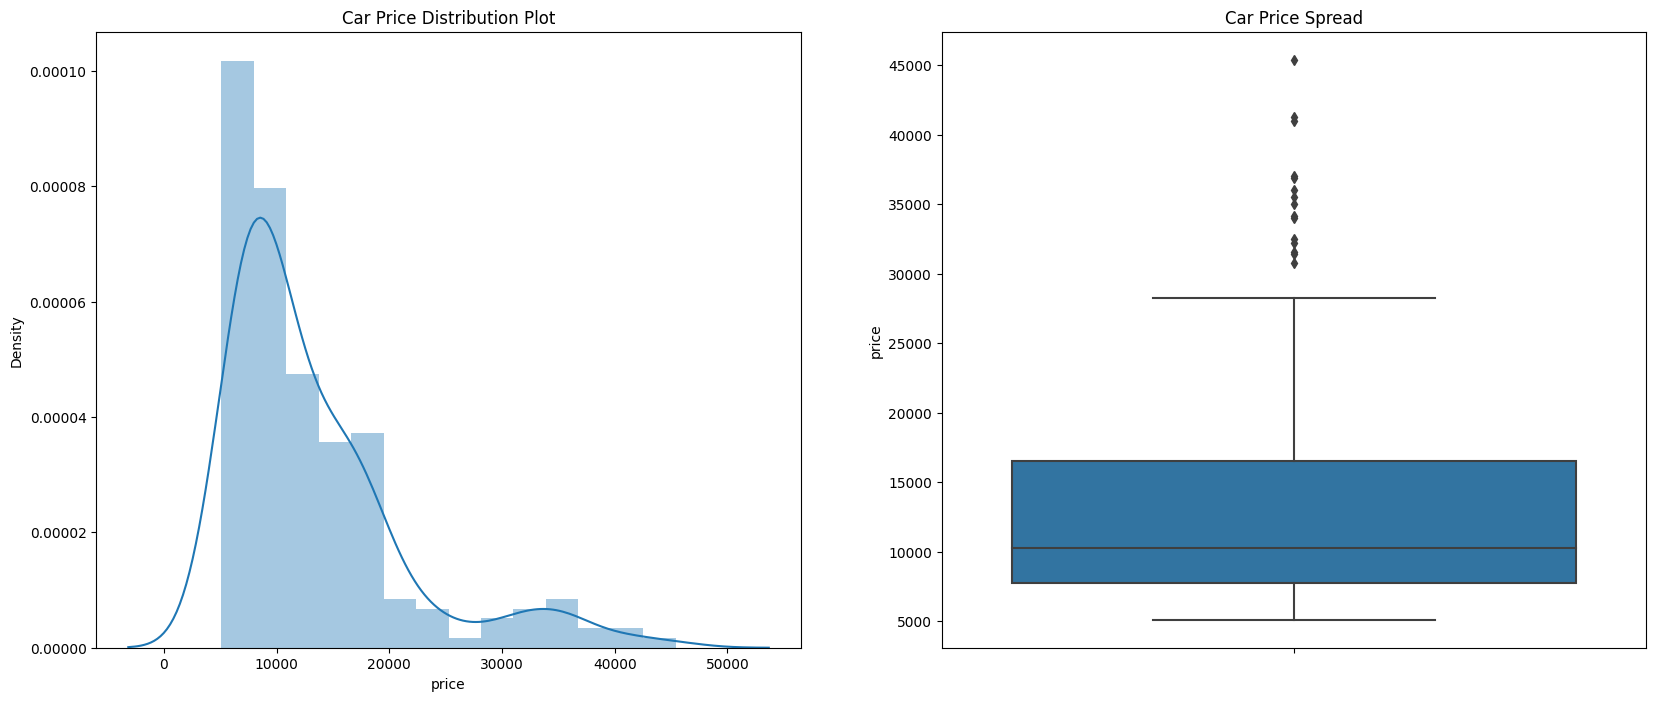

In [12]:
# visualizing the car price
plt.figure(figsize=(20,8))

# using distribution plot
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

# using box plot
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

In [13]:
# car price percentiles
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.99]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
95%      32472.400000
99%      40802.720000
max      45400.000000
Name: price, dtype: float64


- We can see that the price distribution is rightly-skewed (most prices in the dataset are low)
- Significant difference between mean and median 
- Data points are far spread out from mean (high variance in car price)
- 85 percent below 18500 and remaining 15 percents between 18500 and 45400 (see from above)

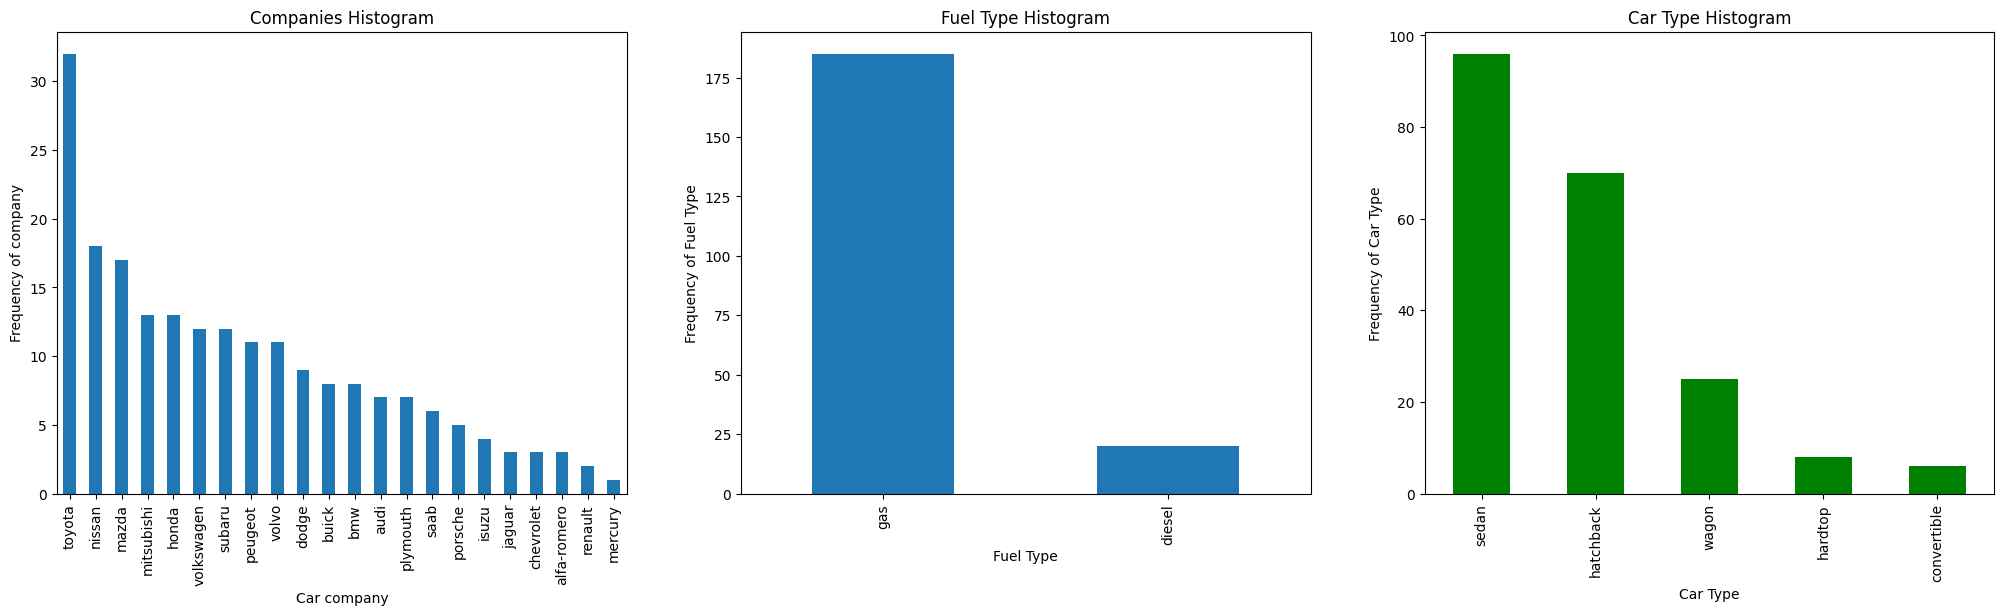

In [27]:
# visualizing the categorical data
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot.bar()
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt2 = cars.fueltype.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt2.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel Type')

plt.subplot(1,3,3)
plt3 = cars.carbody.value_counts().plot.bar(color='green')
plt.title('Car Type Histogram')
plt3.set(xlabel = 'Car Type', ylabel='Frequency of Car Type')

plt.show()

- Toyata seems to be a favored car company
- Majority of the car uses gas
- The preferred car type was sedan

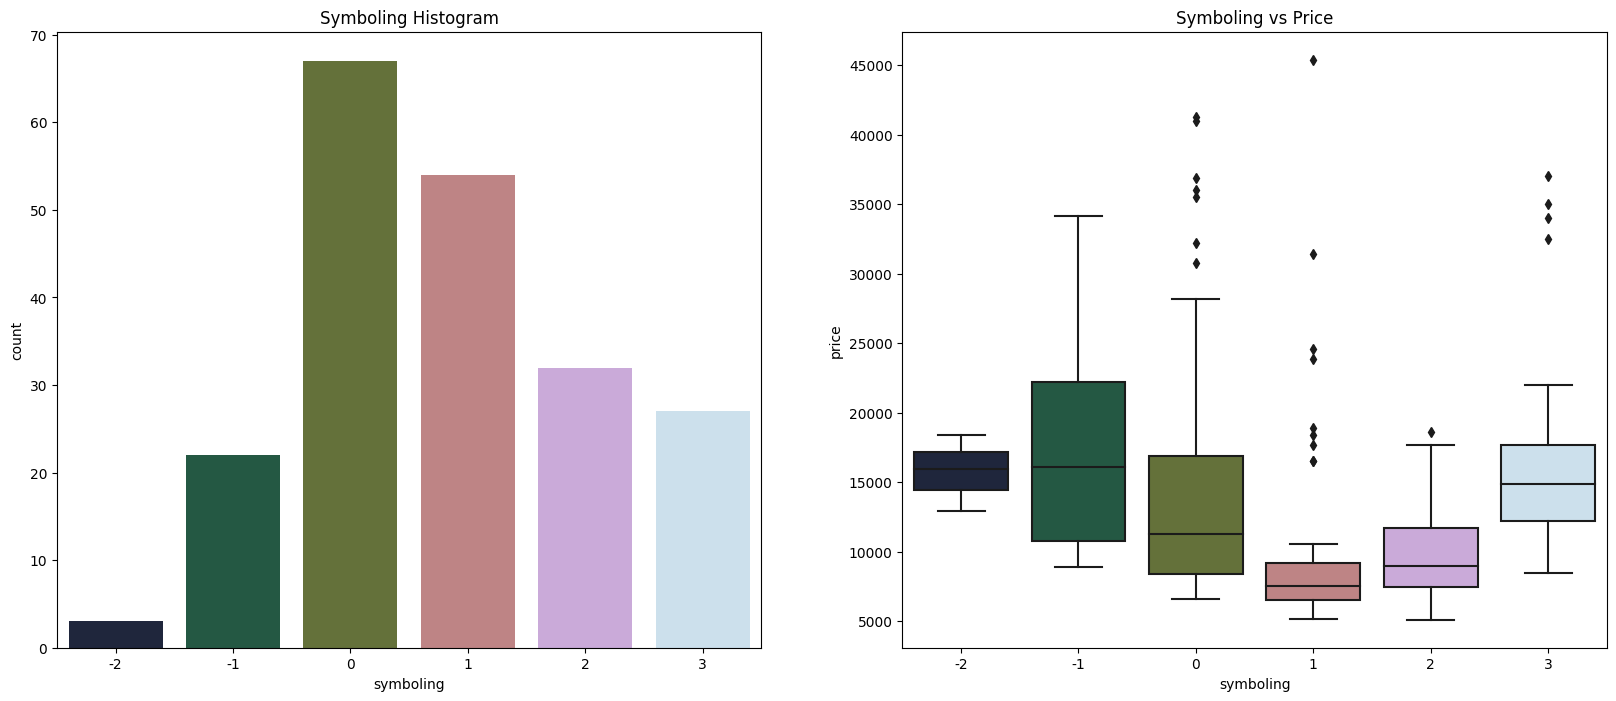

In [31]:
# syboling and price

plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars, x = 'symboling', palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

## Understanding symboling
Ref: https://rpubs.com/Arnav_Jain/DSP_AutomobileDatasetAnalysis

Symboling corresponds to a car's insurance risk level. +3 is very risky and -3 likely safe to be insure

- Most of the cars in the dataset have symboling `1` and `0`
- `-1` symboling has high price (insurance risk rating -1 is quite good)
- Symboling 3 value has price range similar to -2
- Price dip at symboling 1

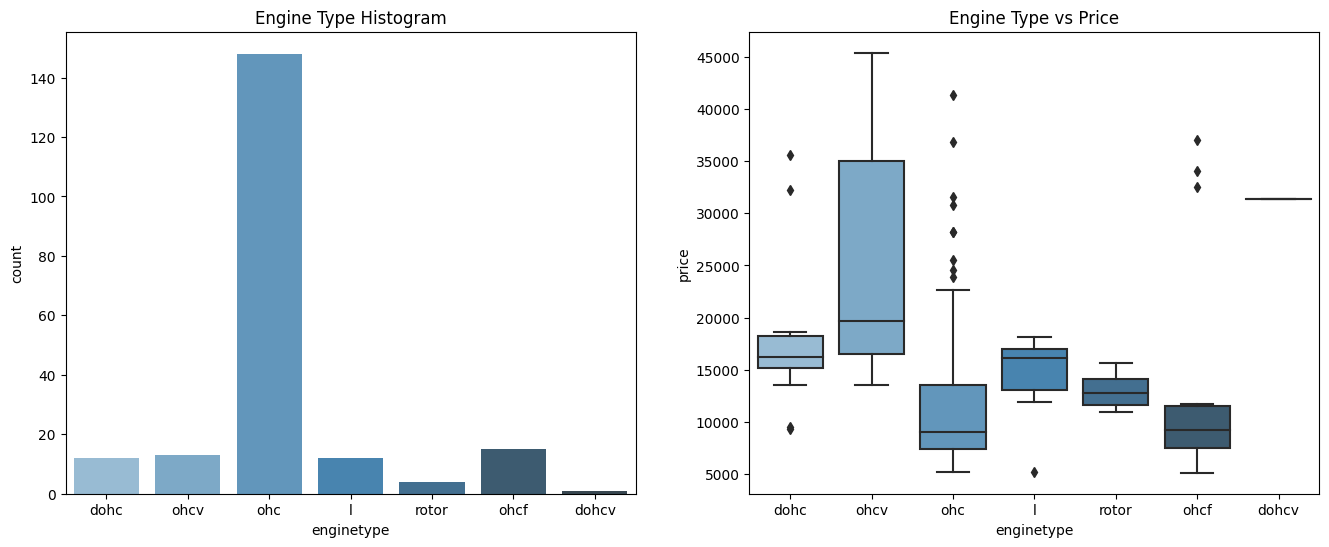

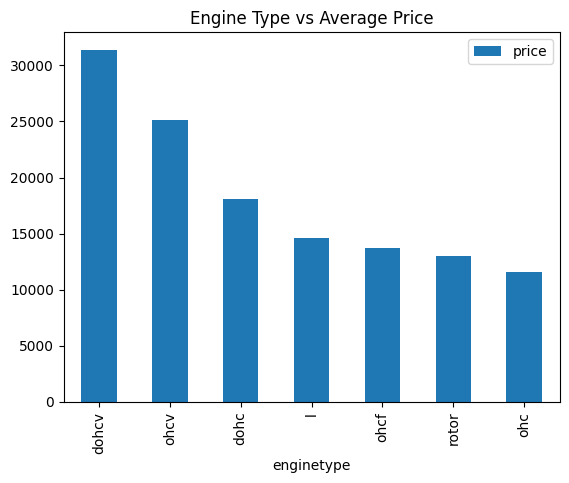

In [33]:
# engine type and price visualization
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt.title('Engine Type Histogram')
sns.countplot(cars, x = 'enginetype', palette=("Blues_d"))

plt.subplot(1,3,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("Blues_d"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Engine Type vs Average Price')
plt.show()

We can see that `ohc` is the most favored engine type
- `ohcv` has the highest price range
- `ohcf` has the lowest price range
- `dohcv` has only one row and that's why the boxplot is a flat line

<Figure size 2500x600 with 0 Axes>

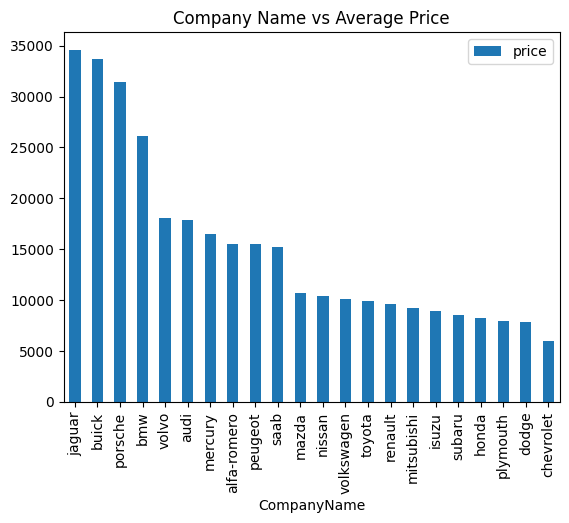

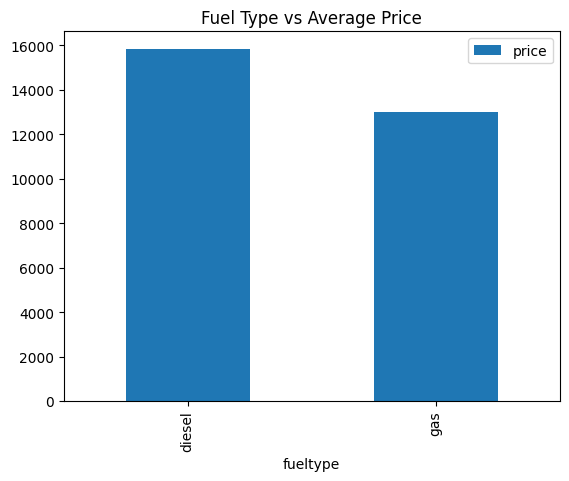

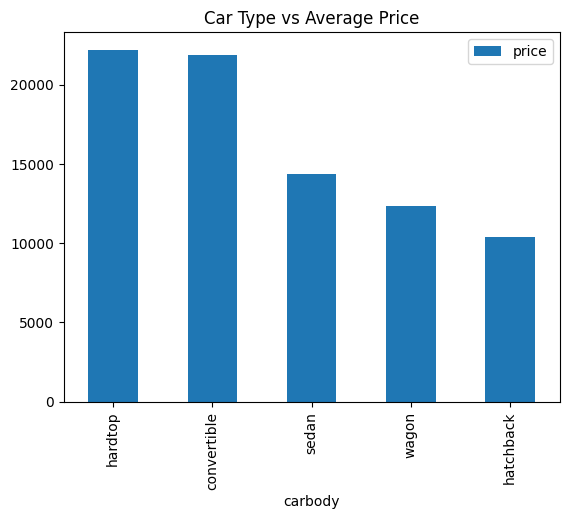

In [34]:
# some other visualization
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

- `jaguar` and `buick` has the highest averge price
- diesel cars price more than gas price, on average
- hardtop and convertible also priced more on average

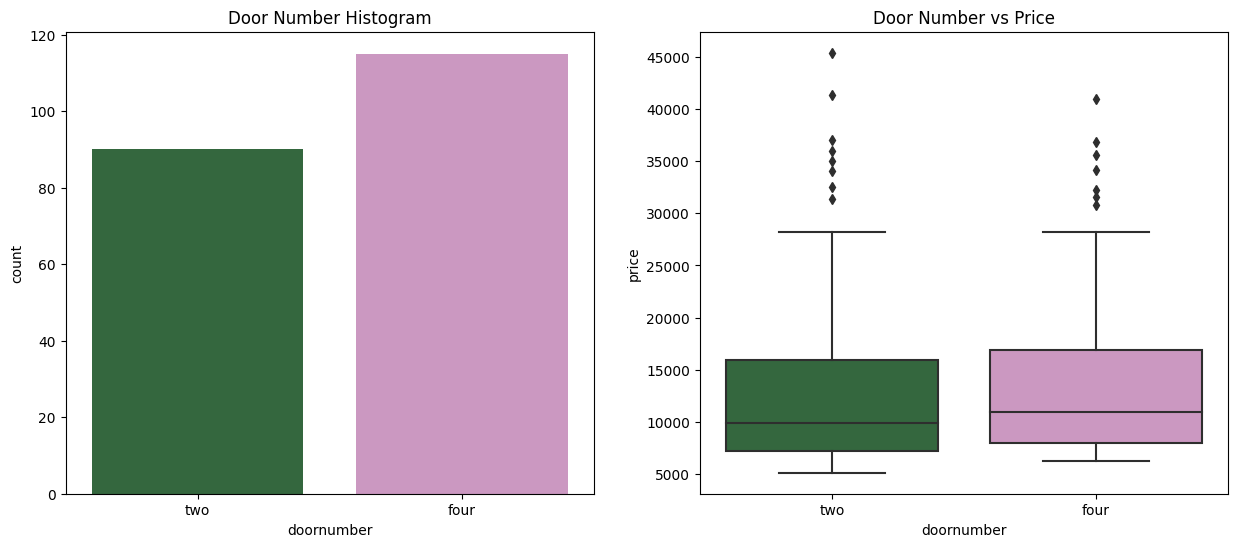

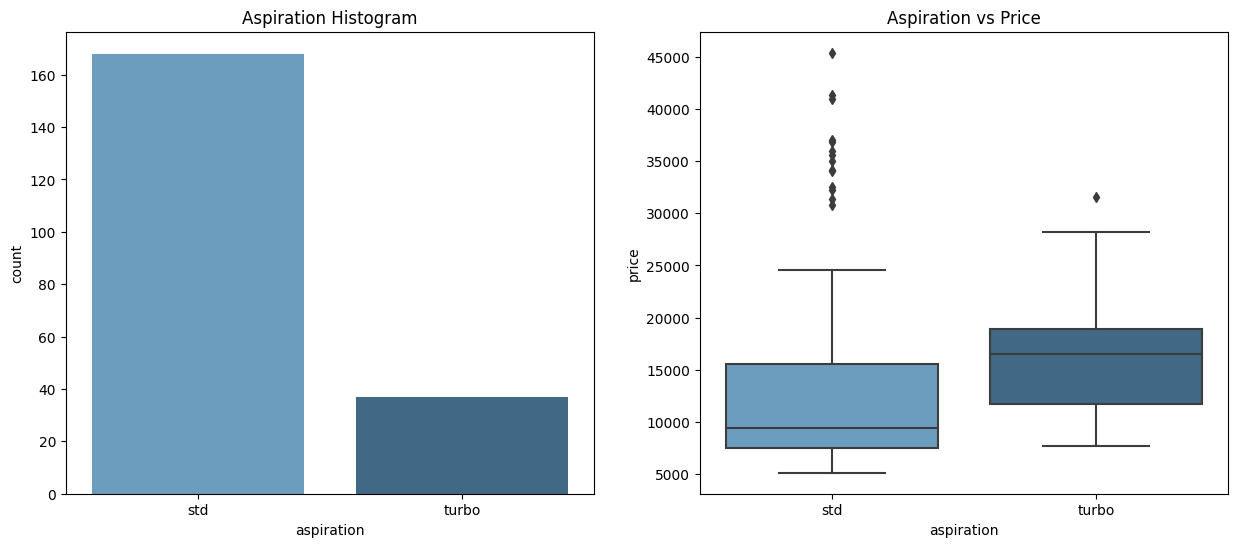

In [35]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars, x = 'doornumber', palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("cubehelix"))

plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars, x = 'aspiration', palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("Blues_d"))

plt.show()

- `door number` not affect the price much as no significant difference between categories
- `turbo` have higher price range than standard

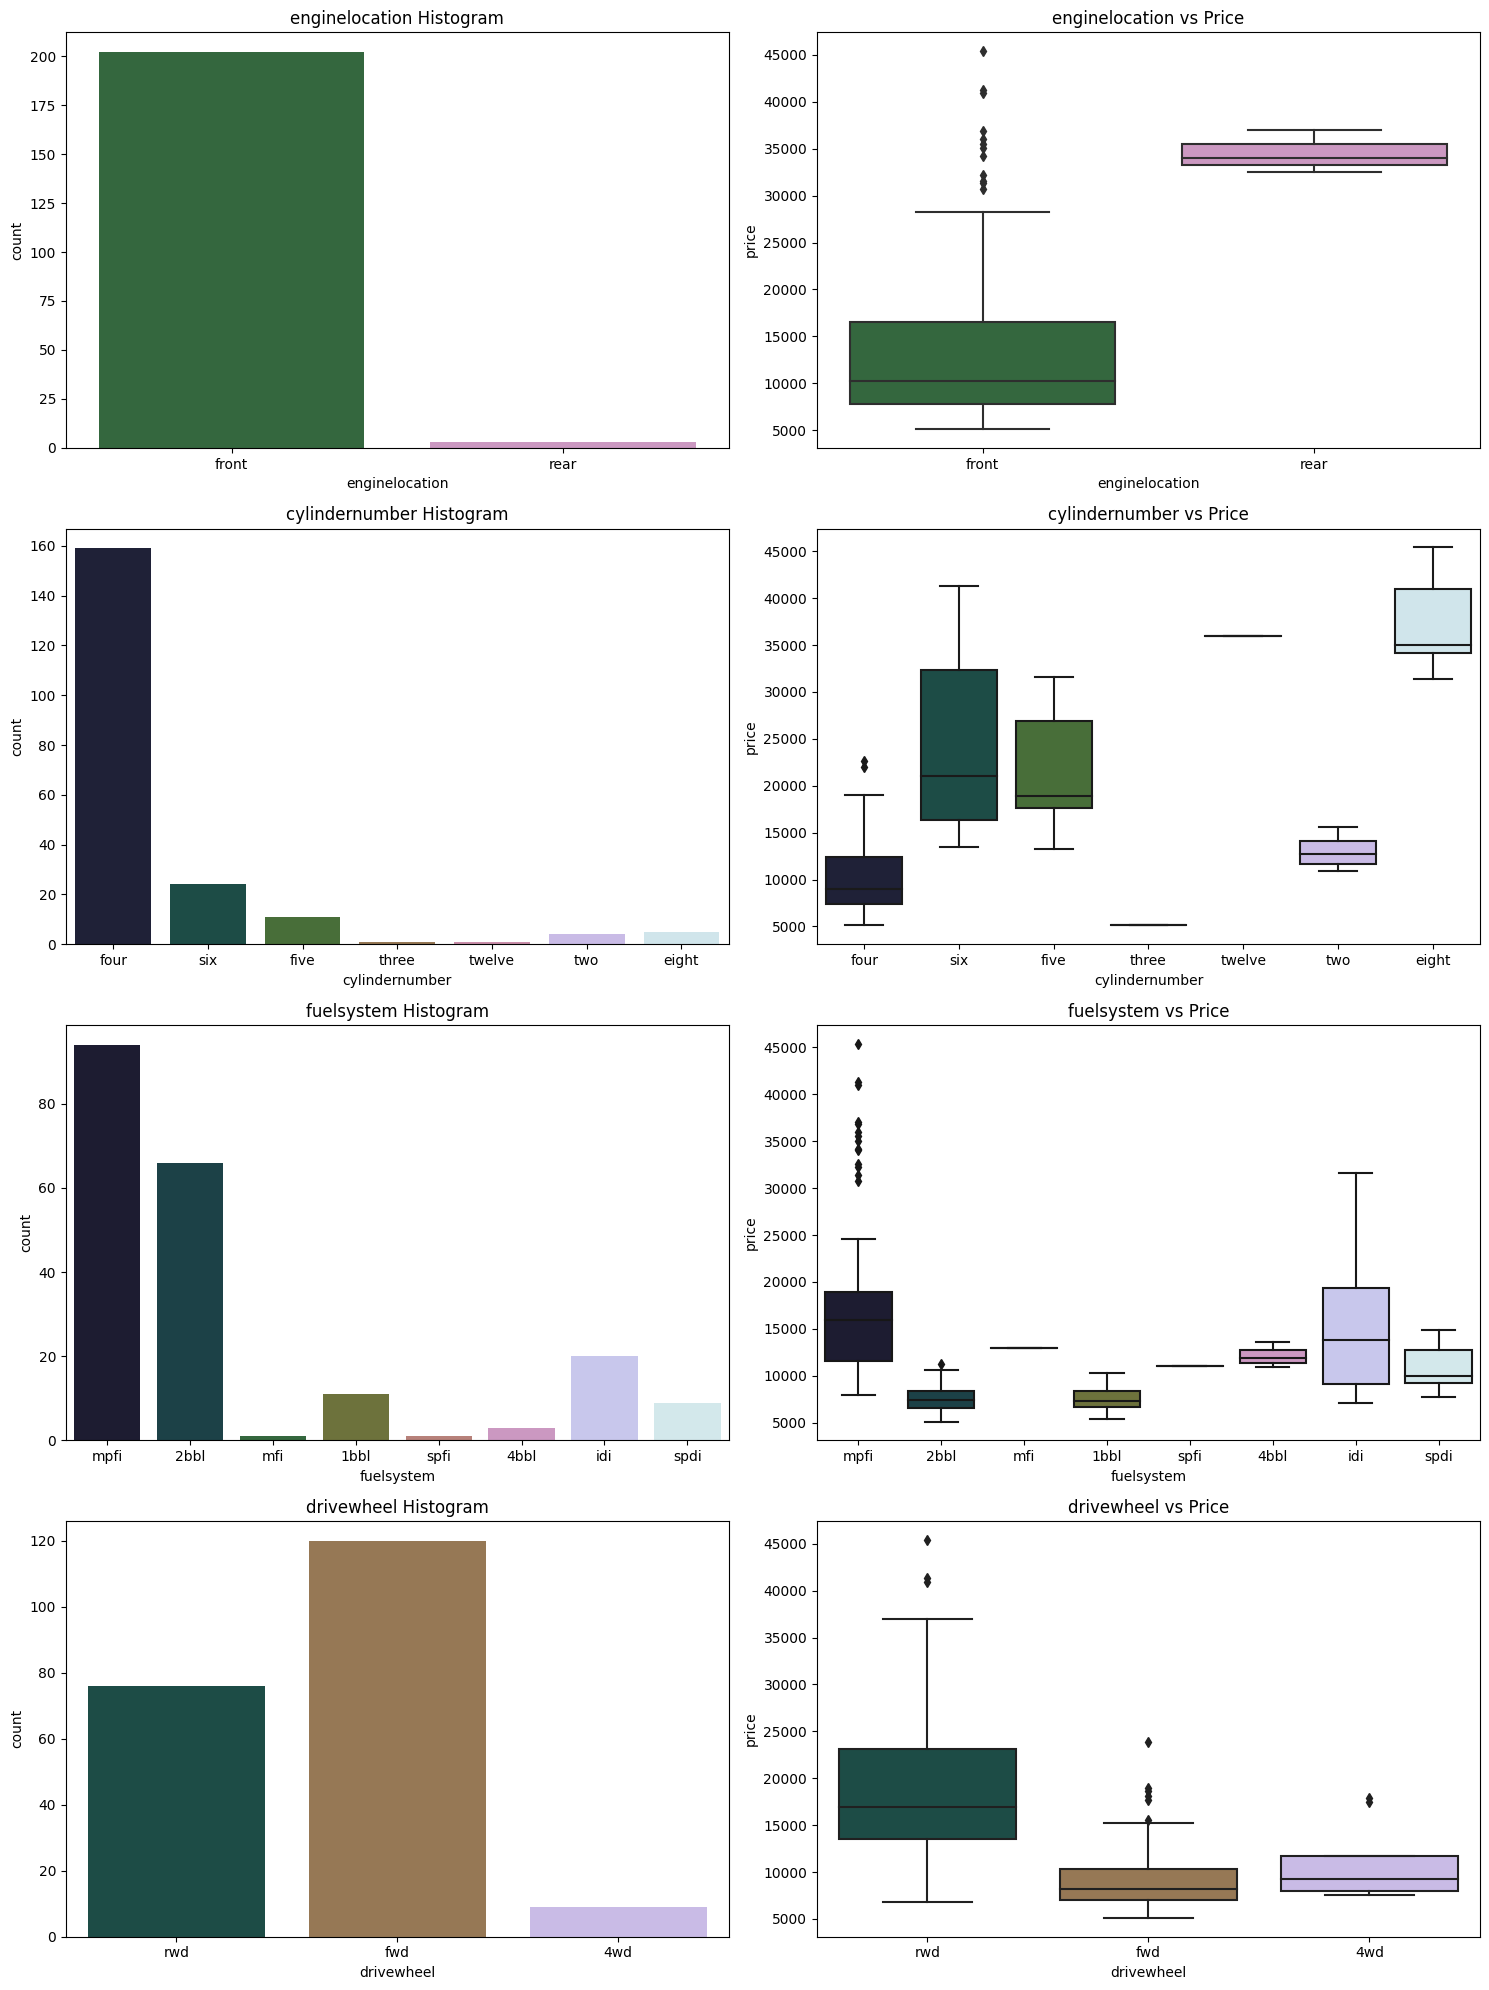

In [40]:
# visualizing the engine
# countplot arguments are different from boxplot
def plot_count(x, fig_loc):
    plt.subplot(4,2,fig_loc)
    plt.title(x+' Histogram')
    sns.countplot(cars, x = x, palette=("cubehelix"))
    plt.subplot(4,2,fig_loc+1)
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("cubehelix"))
    
plt.figure(figsize=(15, 20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

- Too few datapoints for `enginelocation` to make an inference
- Most common cylinders number are 4, 5 and 6 (8 priced the highest)
- `mpfi` and `2bbl` are the most common fuel systems and `mpfi` and `idi` have the highest price range
- High price car prefer `rwd` drivewheel

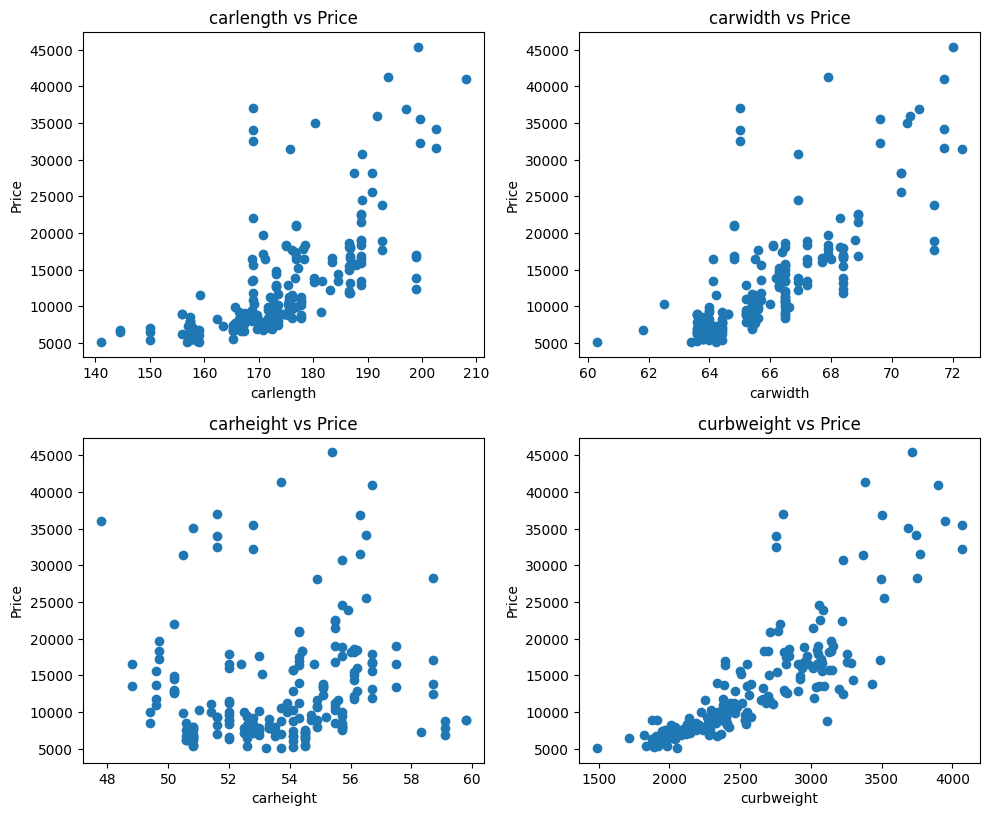

In [41]:
# nuemrical data distribution using scatterplot
def scatter(x, fig_loc):
    plt.subplot(5,2,fig_loc)
    plt.scatter(cars[x], cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10, 20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

- All variables except `carheight` seems to have a positive correlation with price

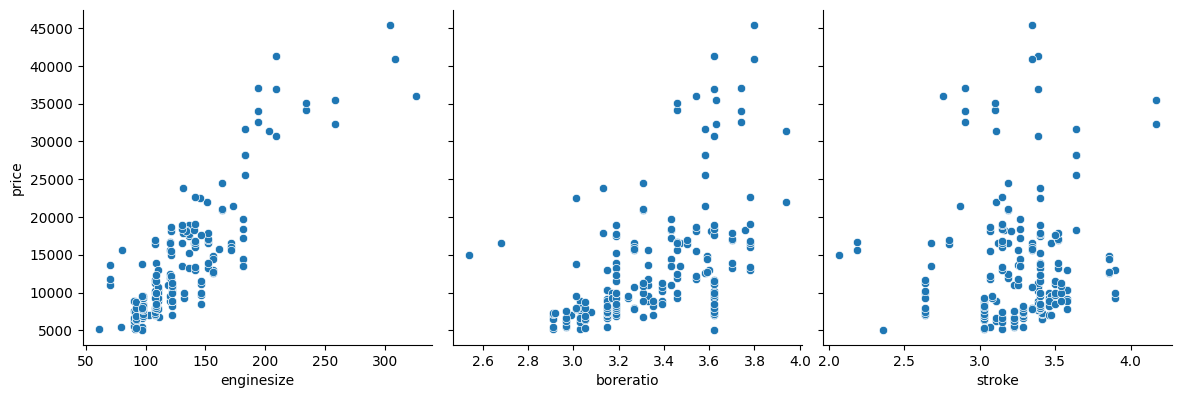

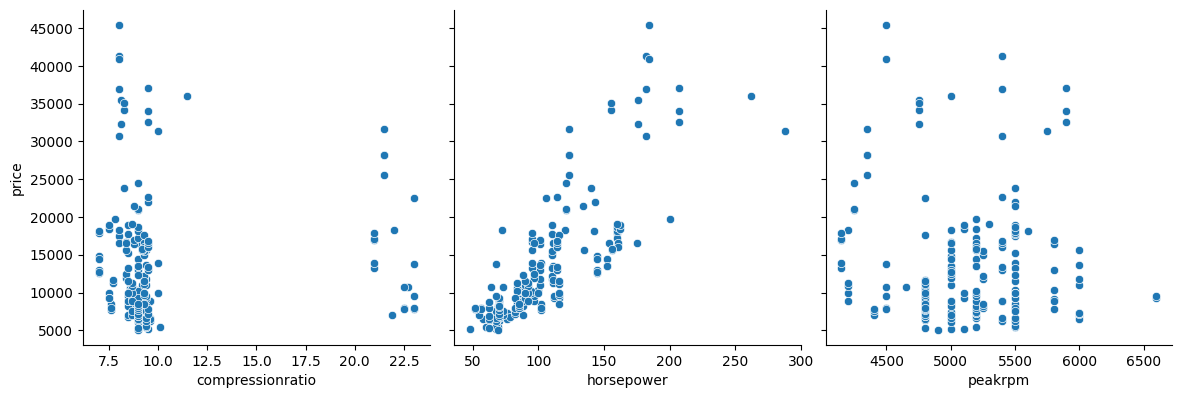

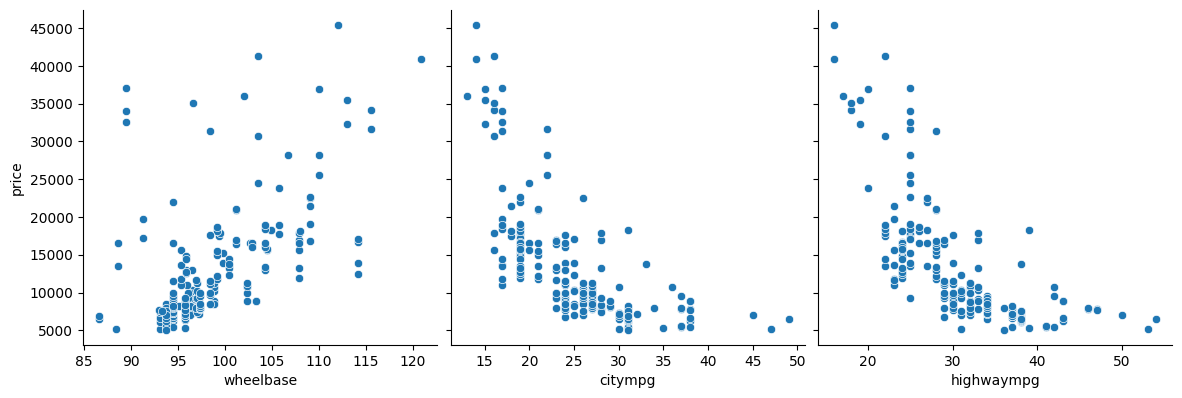

In [42]:
# pairplot
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price', size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

- positive correlation with price on `enginesize`, `boreratio`, `wheelbase`
- negative correlation with price on `citympg` and `highwaympg`

In [43]:
# car length and carwidth correlation
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

# Feature Engineering

In [46]:
# fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [44]:
# bin car company based on th average price of each company
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')

# separating the companies based on price
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


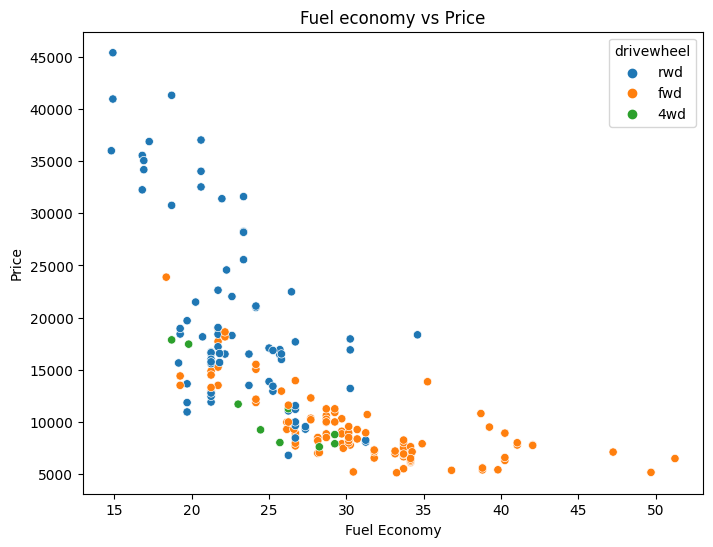

<Figure size 640x480 with 0 Axes>

In [47]:
# bivariate analysis
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'], y=cars['price'], hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

- `fueleconomy` exhibits negative correlation with price 

<Figure size 800x600 with 0 Axes>

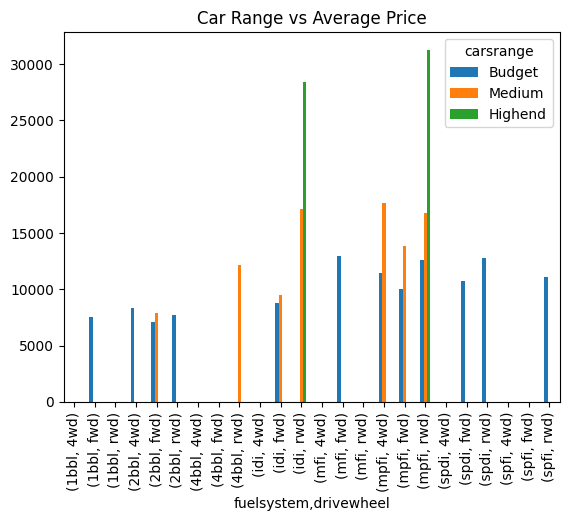

In [48]:
# car range vs price
plt.figure(figsize=(8,6))

df = pd.DataFrame(cars.groupby(['fuelsystem', 'drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

- High ranged cars prefer `rwd` drivewheel with `idi` and `mpfi` fuel system

In [49]:
# getting the significant variables
cars_lr = cars[['price','fueltype','aspiration','carbody','drivewheel','wheelbase','curbweight','enginetype','cylindernumber','enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth','carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


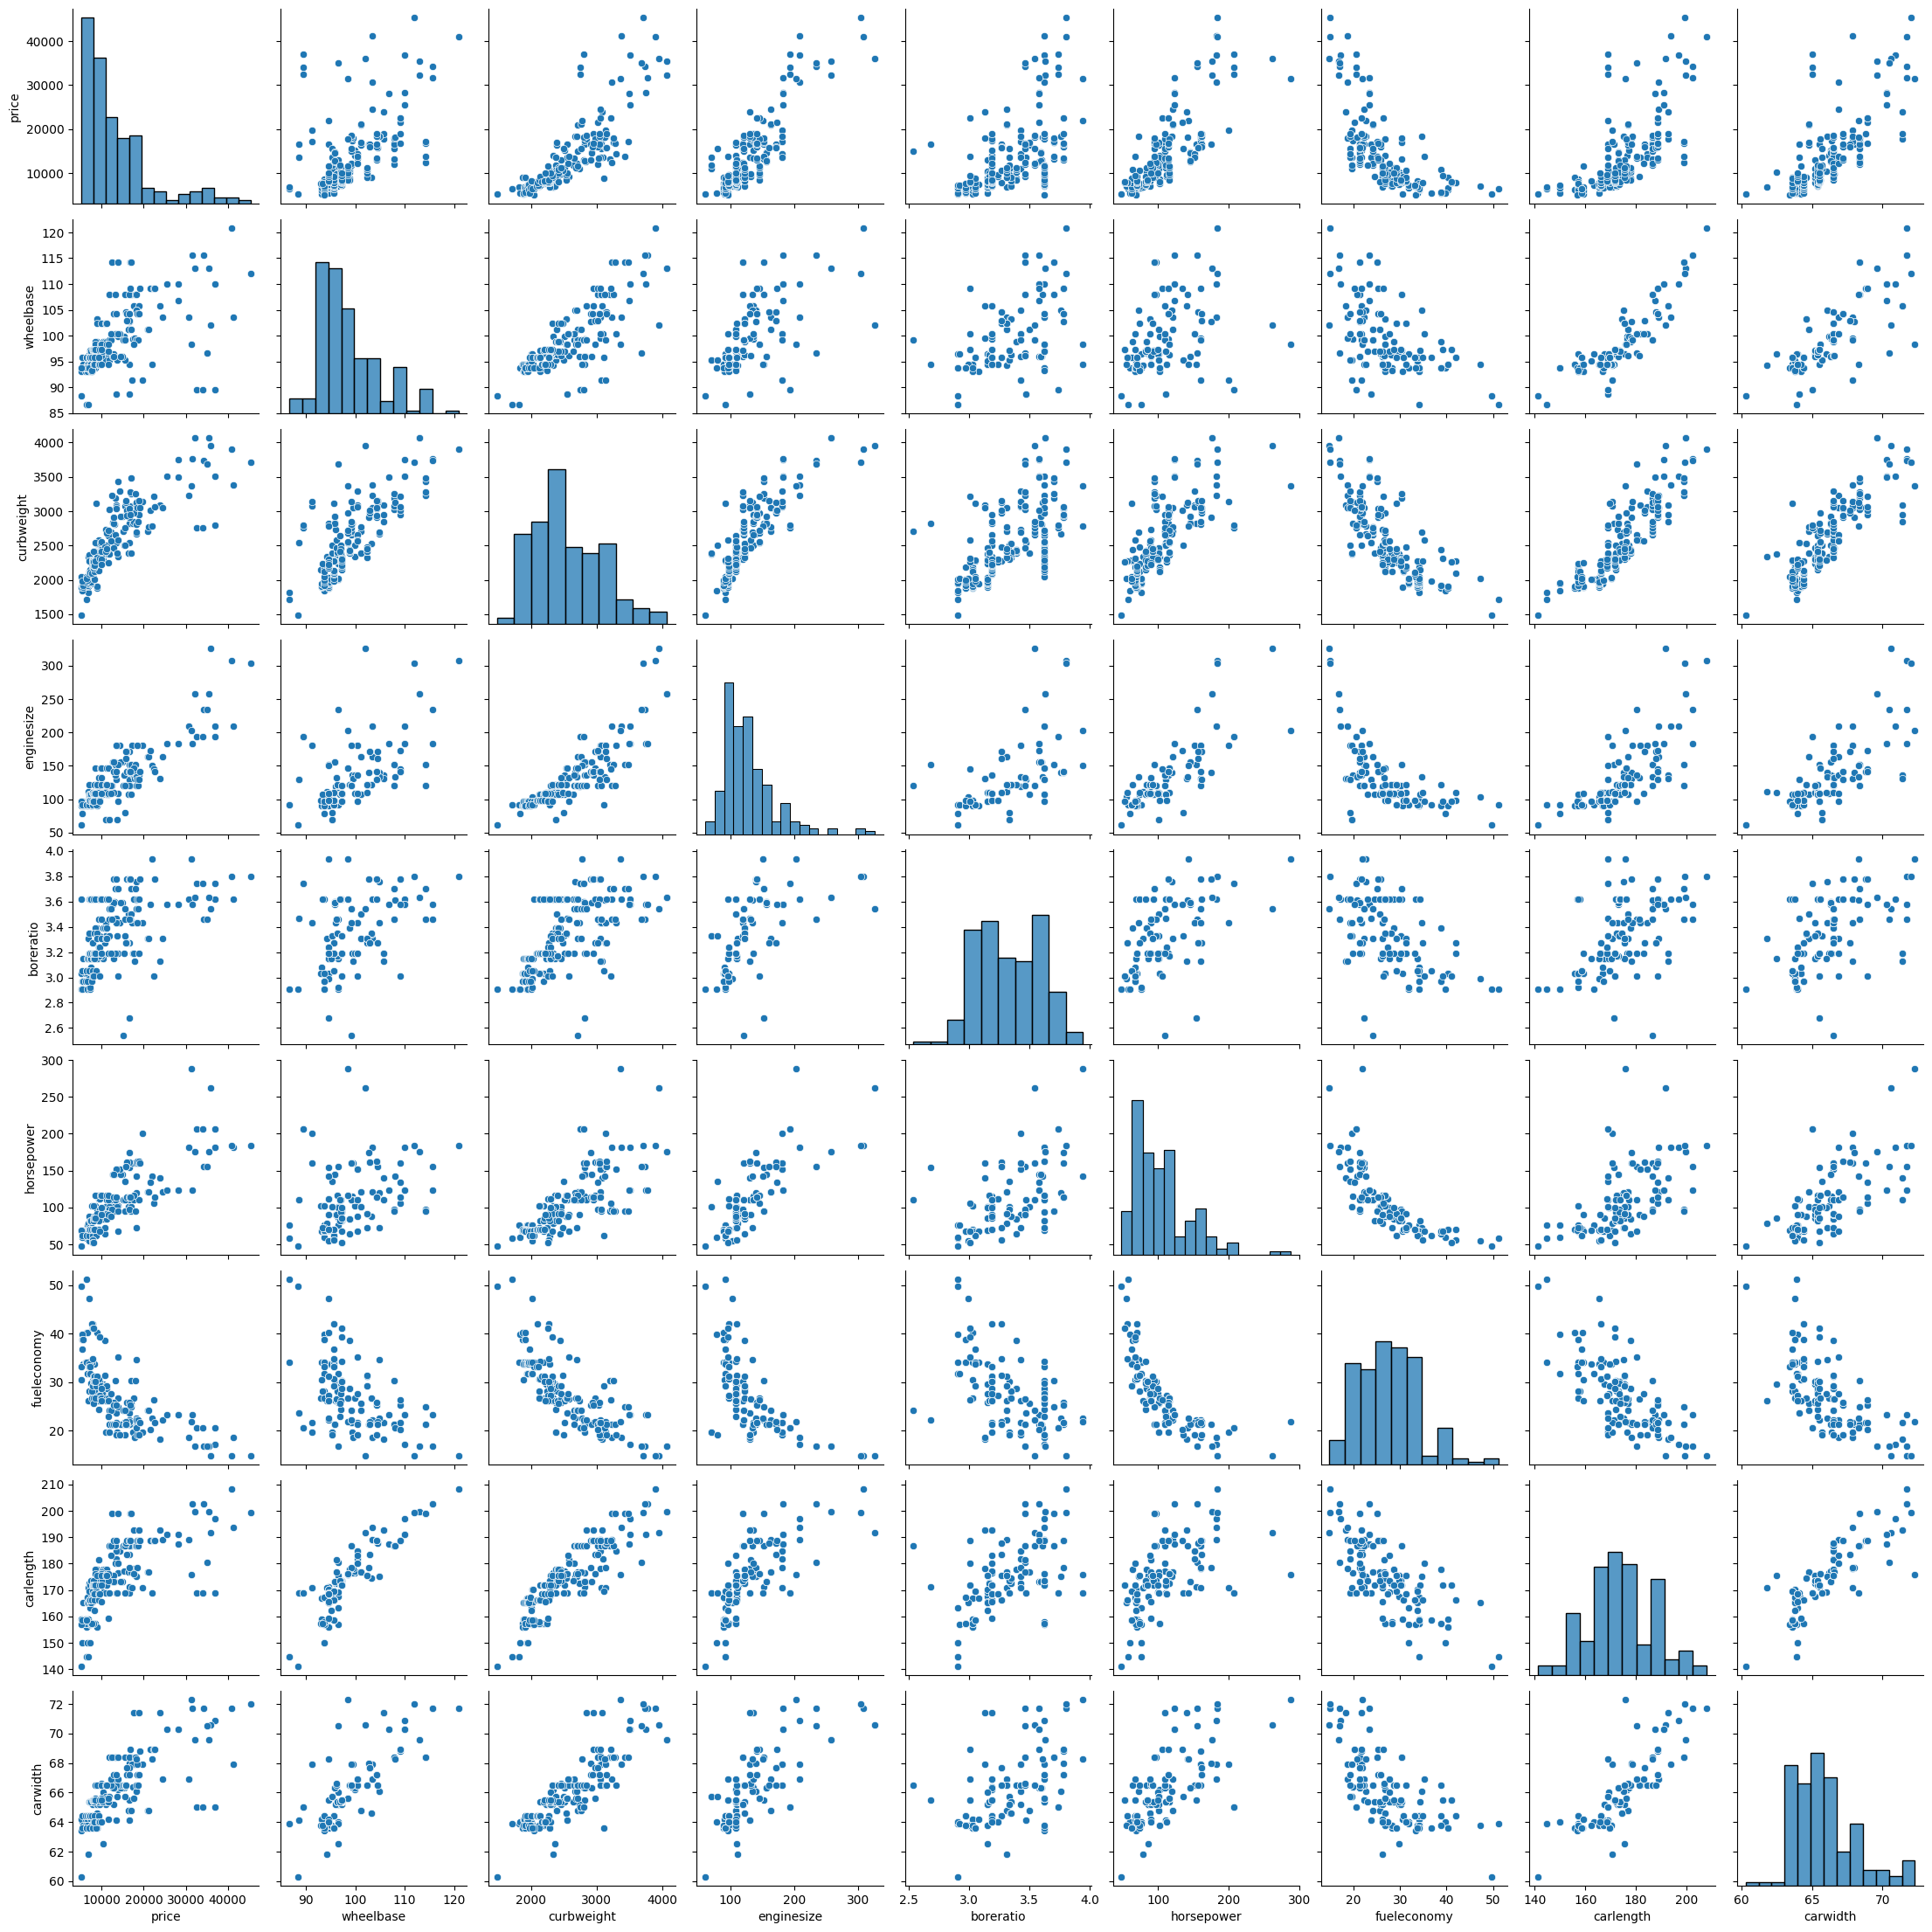

In [50]:
# pair plot of theses variables
sns.pairplot(cars_lr)
plt.show()

# Creating Dummy Variable

In [51]:
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lr = dummies('fueltype', cars_lr)
cars_lr = dummies('aspiration', cars_lr)
cars_lr = dummies('carbody', cars_lr)
cars_lr = dummies('drivewheel', cars_lr)
cars_lr = dummies('enginetype', cars_lr)
cars_lr = dummies('cylindernumber', cars_lr)
cars_lr = dummies('carsrange', cars_lr)

In [53]:
# see the output
display(cars_lr.head())
print(cars_lr.shape)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,True,...,False,False,False,True,False,False,False,False,True,False
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,True,...,False,False,False,True,False,False,False,False,True,False
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,True,...,True,False,False,False,True,False,False,False,True,False
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,True,...,False,False,False,True,False,False,False,False,True,False
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,True,...,False,False,True,False,False,False,False,False,True,False


(205, 31)


# Training and Test Set

In [54]:
# train test split
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
# min max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase','curbweight','enginesize','boreratio','horsepower','carlength','carwidth','fueleconomy','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
# see the scaled data
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,True,...,False,False,False,True,False,False,False,False,False,False
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,True,...,False,False,False,True,False,False,False,False,False,True
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,True,...,False,False,False,True,False,False,False,False,False,False
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,True,...,False,False,False,True,False,False,False,False,True,False
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,True,...,False,False,False,True,False,False,False,False,True,False


In [57]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


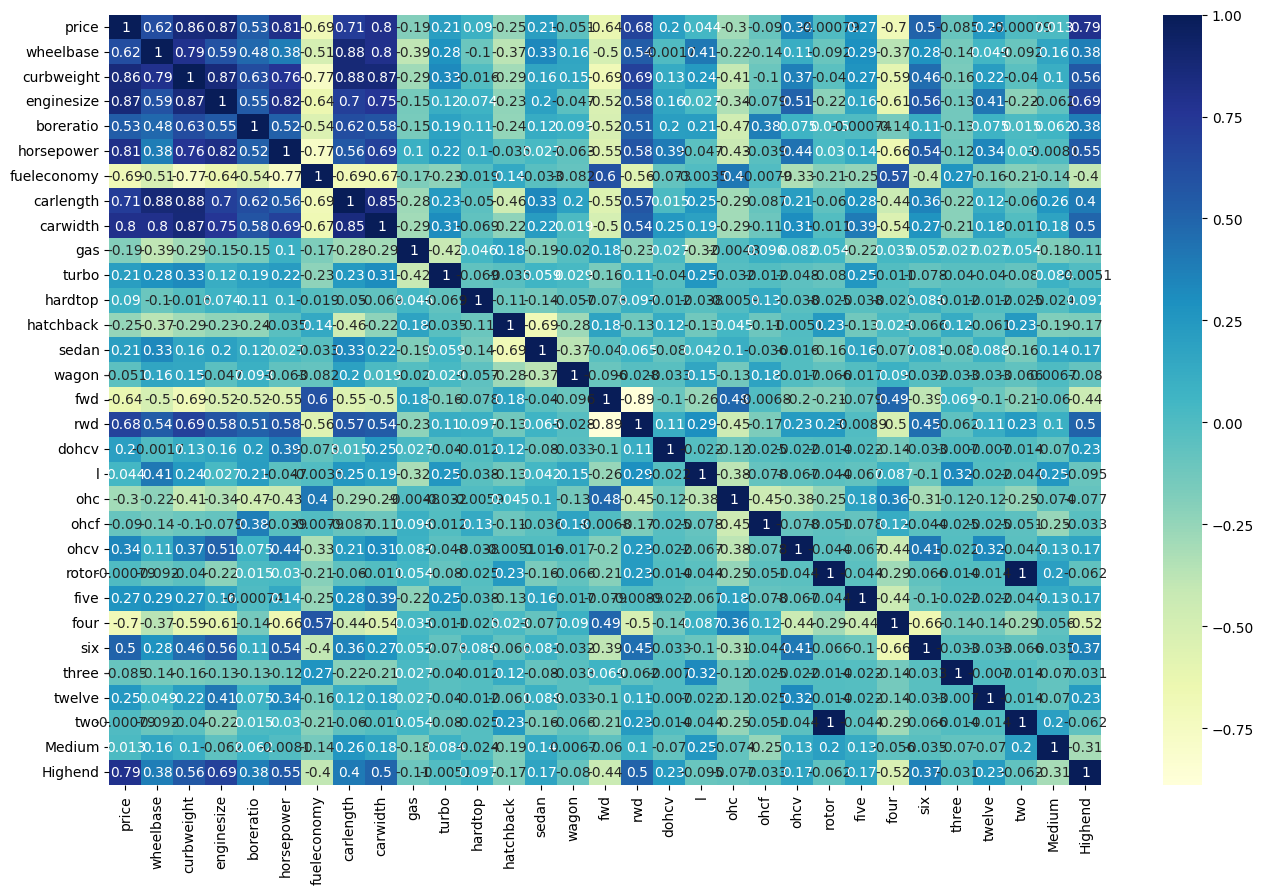

In [58]:
# see the scaled heatmap (correlation)
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- variables highly correlated with price `curbweight`, `enginesize`, `horsepower`, `carwidth` and `highend`

In [59]:
# divide into x and y
y_train = df_train.pop('price')
X_train = df_train

# Model Construction

In [61]:
# import RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 8),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('gas', False, 12),
 ('turbo', False, 13),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 11),
 ('rwd', False, 10),
 ('dohcv', True, 1),
 ('l', False, 14),
 ('ohc', False, 2),
 ('ohcf', False, 3),
 ('ohcv', False, 4),
 ('rotor', False, 16),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 9),
 ('twelve', True, 1),
 ('two', False, 15),
 ('Medium', False, 7),
 ('Highend', True, 1)]

In [66]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'five', 'four',
       'six', 'twelve', 'Highend'],
      dtype='object')

In [67]:
# statsmodel statistics
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,curbweight,horsepower,fueleconomy,carwidth,hardtop,hatchback,sedan,wagon,dohcv,five,four,six,twelve,Highend
122,0.244828,0.272692,0.083333,0.530864,0.291667,False,False,True,False,False,False,True,False,False,False
125,0.272414,0.500388,0.395833,0.213992,0.666667,False,True,False,False,False,False,True,False,False,True
166,0.272414,0.314973,0.266667,0.344307,0.308333,False,True,False,False,False,False,True,False,False,False
1,0.068966,0.411171,0.262500,0.244170,0.316667,False,False,False,False,False,False,True,False,False,False
199,0.610345,0.647401,0.475000,0.122085,0.575000,False,False,False,True,False,False,True,False,False,False


In [77]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X.astype(float)).fit() # use astype to avoid numpy pandas error
    print(lm.summary())
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [72]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.4
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.16e-68
Time:                        09:38:23   Log-Likelihood:                 213.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     127   BIC:                            -348.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0108      0.050      0.214      

p-value of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [73]:
# drop twelve variables
X_train_new = X_train_rfe.drop(['twelve'], axis=1)

In [74]:
# run the model again after removing twelve
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.30e-68
Time:                        09:40:16   Log-Likelihood:                 212.01
No. Observations:                 143   AIC:                            -394.0
Df Residuals:                     128   BIC:                            -349.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0290      0.050      0.585      

In [75]:
# drop fueleconomy and run the model again
X_train_new = X_train_new.drop(['fueleconomy'], axis=1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.6
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           6.97e-69
Time:                        09:40:49   Log-Likelihood:                 209.92
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     129   BIC:                            -350.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0765      0.044      1.751      0.0

In [78]:
# check the vif
checkVIF(X_train_new)

,Features,VIF
0,const,79.21
7,sedan,13.00
2,curbweight,12.56
6,hatchback,11.22
4,carwidth,7.87
1,wheelbase,6.94
3,horsepower,6.49
8,wagon,6.36
11,four,4.69
12,six,3.46


In [79]:
# drop curbweight and run the model again
X_train_new = X_train_new.drop(['curbweight'], axis=1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.03e-69
Time:                        09:44:04   Log-Likelihood:                 207.12
No. Observations:                 143   AIC:                            -388.2
Df Residuals:                     130   BIC:                            -349.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.043      2.334      0.0

In [80]:
#check the vif
checkVIF(X_train_new)

,Features,VIF
0,const,74.57
6,sedan,11.26
5,hatchback,9.63
3,carwidth,7.17
7,wagon,6.11
1,wheelbase,4.81
10,four,4.69
2,horsepower,4.17
11,six,3.45
9,five,2.26


In [81]:
# drop sedan and run the model again
X_train_new = X_train_new.drop(['sedan'], axis=1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.42e-66
Time:                        09:44:33   Log-Likelihood:                 198.49
No. Observations:                 143   AIC:                            -373.0
Df Residuals:                     131   BIC:                            -337.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.034     -0.551      0.5

In [82]:
# drop wagon and run the model again
X_train_new = X_train_new.drop(['wagon'], axis=1)
X_train_new = X_train_new.drop(['dohcv'], axis=1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     154.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.49e-66
Time:                        09:45:33   Log-Likelihood:                 191.12
No. Observations:                 143   AIC:                            -362.2
Df Residuals:                     133   BIC:                            -332.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0159      0.035     -0.455      0.6

# Model Residuals Analysis

In [83]:
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

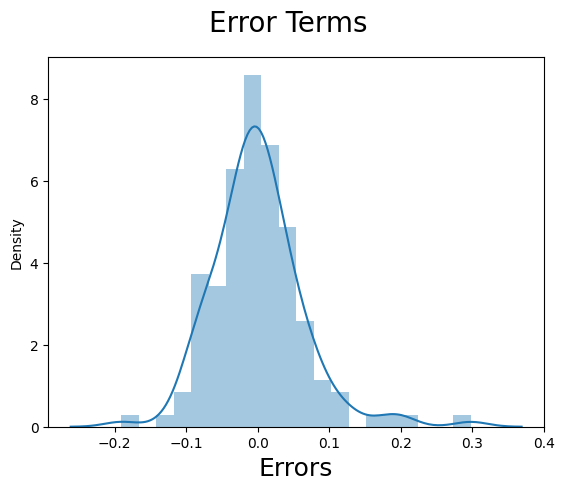

In [84]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

- The error terms seem to be normally distributed, so the linear model assumption seems to be fulfilled

# Prediction and Evaluation

In [85]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [86]:
# dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [87]:
X_train_new = X_train_new.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [88]:
y_pred = lm.predict(X_test_new)

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8816925583799405

Text(0, 0.5, 'y_pred')

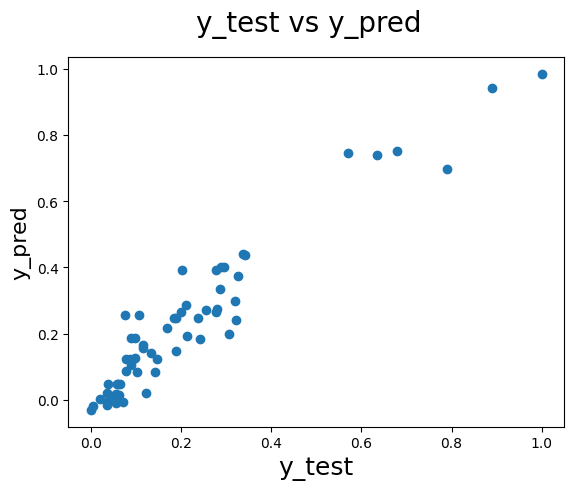

In [90]:
# ytest vs ypred plot
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [91]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     154.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.49e-66
Time:                        09:49:24   Log-Likelihood:                 191.12
No. Observations:                 143   AIC:                            -362.2
Df Residuals:                     133   BIC:                            -332.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0159      0.035     -0.455      0.650      -0.085       0.053
wheelbase      0.0871      0.055      1.597      0.113      -0.021       0.195
horsepower     0.3559      0.066      5.431      0.000       0.226       0.486
carwidth       0.3216      0.078      4.120      0.000       0.167       0.476
hardtop        0.0561      0.040      1.394      0.166      -0.024       0.136
hatchback     -0.0359      0.013     -2.744      0.007      -0.062      -0.010
five          -0.0269      0.033     -0.803      0.423      -0.093       0.039
four          -0.0659      0.027     -2.425      0.017      -0.120      -0.012
six            0.0096      0.029      0.329      0.743      -0.048       0.067
Highend        0.2555      0.022     11.672      0.000       0.212       0.299
==============================================================================
Omnibus:                       37.727   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.259
Skew:                           1.015   Prob(JB):                     3.78e-23
Kurtosis:                       6.634   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the R-squared and the adjusted one we can see that 90 percent of the variation were being explained
- The prob of f-statistics is almost zero, our model explaining 90% of the variance is not just by luck
- Most of the p-values less than 0.05 means the predictors are statistically significant